<a href="https://colab.research.google.com/github/sgathai/dsc-data-serialization-lab/blob/master/K_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Why  Silhouette is better than Elbow Method in K-means Clustering**

**What is K-means Clustering?**

**K-means **clustering is a distance-based unsupervised clustering algorithm where data points that are close to each other are grouped in a given number of clusters/groups.

Following are the steps followed by the K-means algorithm:

1. Initialize ‘K’ i.e number of clusters to be created.
2. Randomly assign K centroid points.
3. Assign each data point to its nearest centroid to create K clusters.
4. Re-calculate the centroids using the newly created clusters.
5. Repeat steps 3 and 4 until the centroid gets fixed.

There are many methods for finding the optimal number of clusters (k) in k-clustering. Here are three of the most common methods

**What is the Elbow method and its drawback?**

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.

**The Elbow curve is expected to look like this 😊**



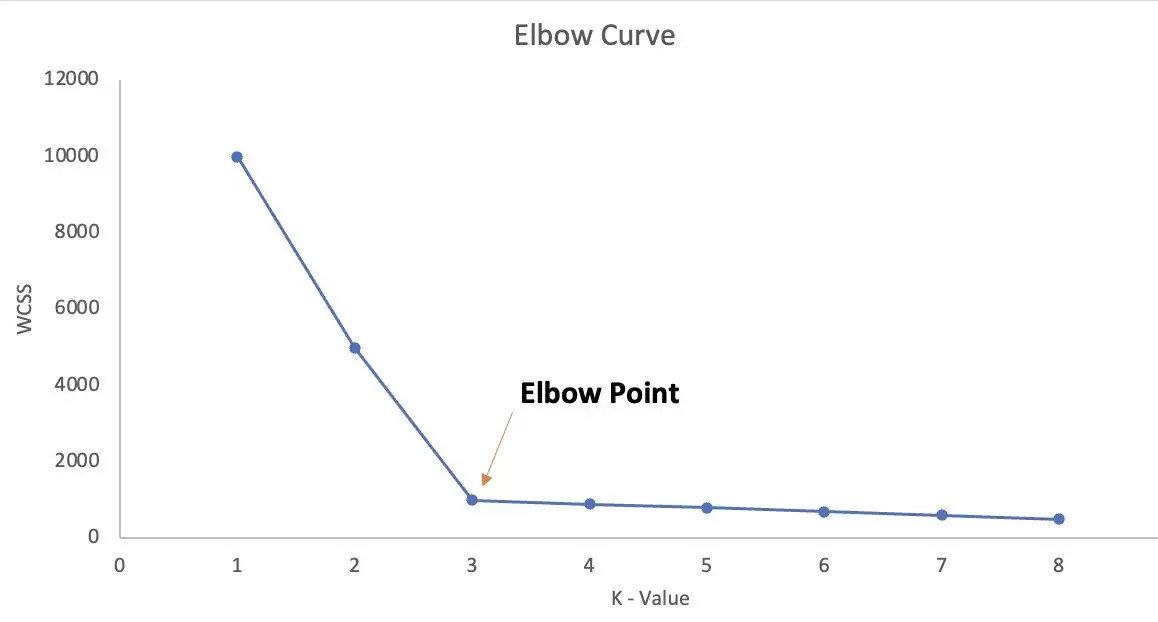



**What it looks like!😒**

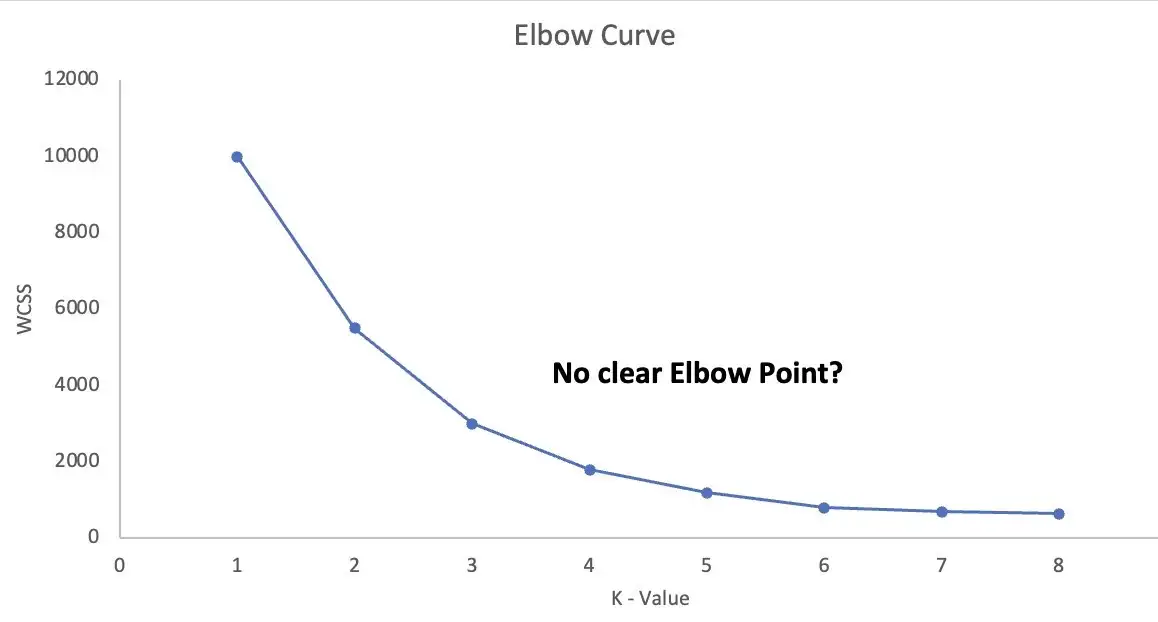



So, in the majority of the real-world datasets, it is not very clear to identify the right ‘K’ using the elbow method.



**So, how do we find ‘K’ in K-means?**

The Silhouette score is a very useful method to find the number of K when the Elbow method doesn't show the Elbow point.

The value of the Silhouette score ranges from -1 to 1. Following is the interpretation of the Silhouette score.

* 1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.

* 0: Clusters are overlapping.

* -1: Points are wrongly assigned in a cluster.

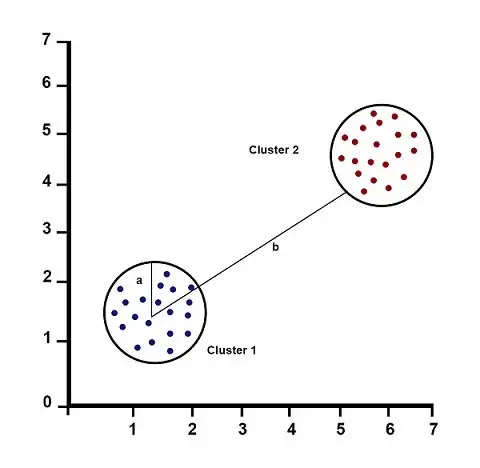



**Silhouette Score** = (b-a)/max(a,b)

where, a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

1. **The elbow method**:

This method plots the within-cluster sum of squares (WSS) for different values of k. The WSS is a measure of how well the data points in each cluster are clustered together. The elbow method looks for a point in the WSS curve where the curve starts to bend sharply. This point is often considered to be the optimal number of clusters.


**Python Implementation**

Let’s compare the Elbow curve and the Silhouette score using the Iris dataset.

The Elbow curve can be created using the following code:

In [ ]:
#import libraries
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

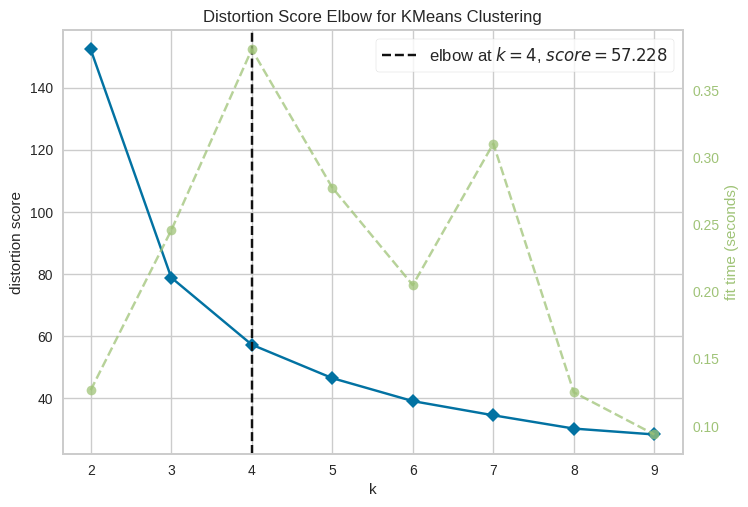

In [ ]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()      # Finalize and render the figure

The Elbow plot finds the elbow point at K=4

The above graph selects an Elbow point at K=4, but K=3 also looks like a plausible elbow point. So, it is not clear what should be the Elbow point. Let’s validate the value of K using the Silhouette plot (using the below code).

2. **The silhouette method:**

This method calculates a measure called the silhouette coefficient for each data point. The silhouette coefficient measures how well a data point is clustered with its own cluster compared to other clusters. The silhouette coefficient for a data point ranges from -1 to 1. A high silhouette coefficient indicates that the data point is well-clustered with its own cluster. The optimal number of clusters is the value of k that produces the highest average silhouette coefficient.

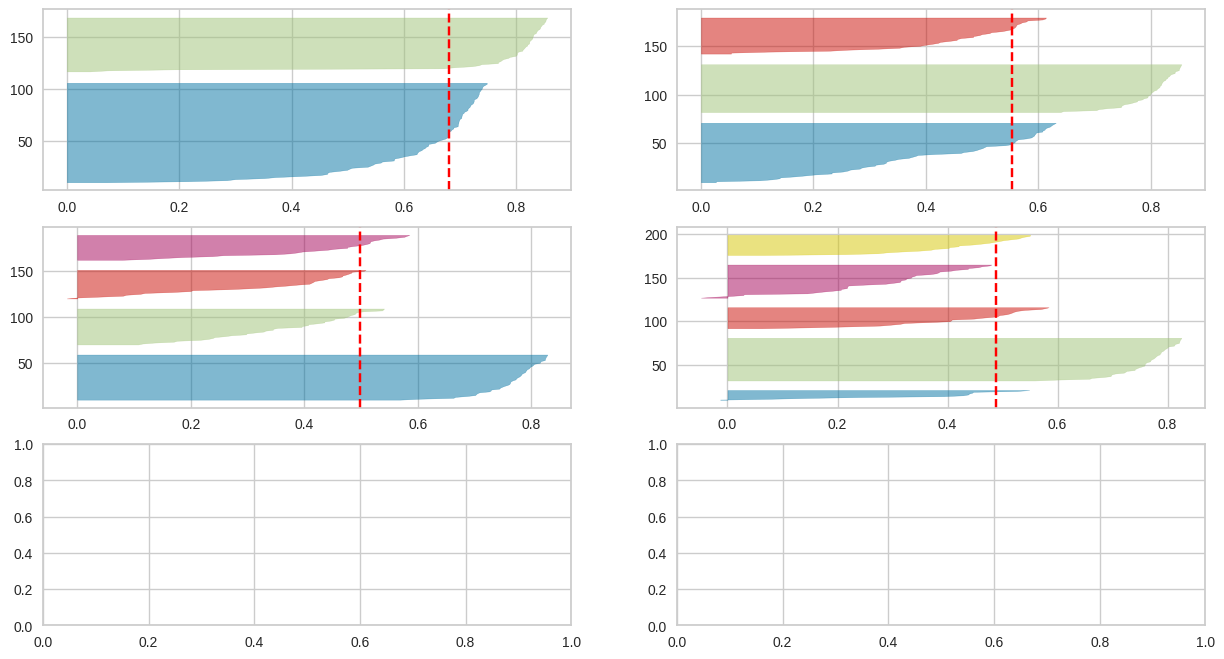

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

The Silhouette score is maximum(0.68) for K = 2 but that’s not sufficient to select the optimal K.

The following conditions should be checked to pick the right ‘K’ using the Silhouette plots:

1. For a particular K, all the clusters should have a Silhouette score more than the average score of the dataset (represented by a red dotted line). The x-axis represents the Silhouette score. The clusters with K = 4 and 5 get eliminated as they don’t follow this condition.
2. There should not be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points. For K = 2, the blue cluster has almost twice the width as compared to the green cluster. This blue cluster gets broken down into 2 sub-clusters for K = 3 and thus forms clusters of uniform size.

So, the Silhouette plot approach gives us K = 3 as the optimal value.

We should select K = 3 for the final clustering on the Iris dataset.

In [ ]:
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


validate the output clusters by indexing/checking the distribution of the input features within the clusters.


* check bellow for alternative way of checking the clusters.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


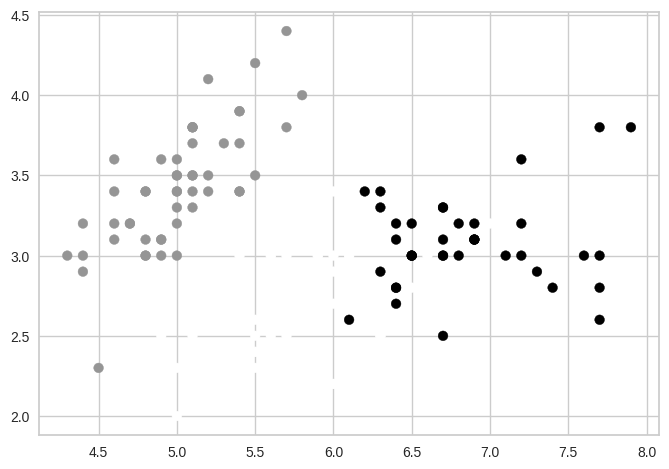

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model to the data
kmeans.fit(iris.data)

# Predict the cluster labels for each data point
labels = kmeans.predict(iris.data)

# Print the cluster labels
print(labels)

# Visualize the clusters with distinct colors
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=labels)

plt.show()

Conclusion

Elbow curve and Silhouette plots both are very useful techniques for finding the optimal K for K-means clustering. In real-world datasets, you will find quite a lot of cases where the Elbow curve is not sufficient to find the right ‘K’. In such cases, you should use the Silhouette plot to figure out the optimal number of clusters for your dataset.

I would recommend you to use both the techniques together to figure out the optimal K for K-means clustering.

* Bonus
3. The gap statistic method:

This method calculates a statistic called the gap statistic for different values of k. The gap statistic measures the difference between the within-cluster sum of squares of the k clusters and the within-cluster sum of squares of a random dataset with the same number of data points and the same number of features. The optimal number of clusters is the value of k that produces the largest gap statistic.

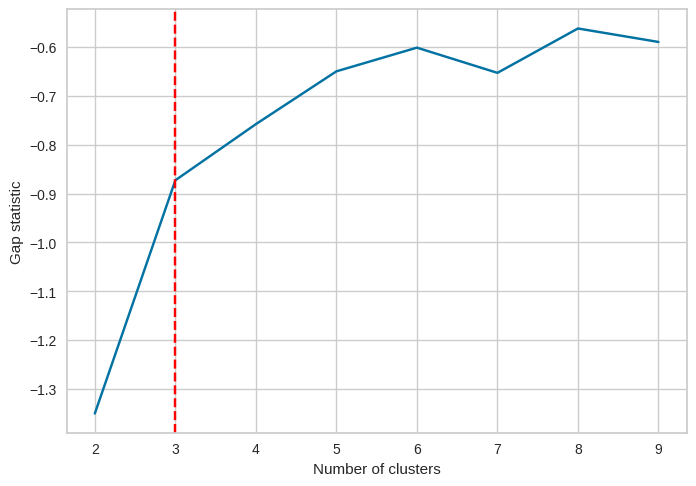

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Get the features and labels
X = iris.data
y = iris.target

# Calculate the gap statistic for different values of k
gap_statistics = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X)
    wss = km.inertia_
    ref_ds = np.random.rand(X.shape[0], X.shape[1])
    ref_km = KMeans(n_clusters=k, n_init=10)
    ref_km.fit(ref_ds)
    ref_wss = ref_km.inertia_
    gap_statistics.append(np.log(ref_wss) - np.log(wss))

# Plot the gap statistic
plt.plot(range(2, 10), gap_statistics)
plt.axvline(x=3, color='red', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("Gap statistic")
plt.show()

# The optimal number of clusters is the value of k that produces the largest gap statistic.
# In this case, the optimal number of clusters is 3.

* The optimal number of clusters is the value of k that produces the largest gap statistic.
* In this case, the optimal number of clusters is 3.

* Conclusion

The best method for finding the optimal number of clusters depends on the specific dataset and the goals of the clustering task. The elbow method is a simple and intuitive method, but it can be sensitive to noise in the data. The silhouette method is a more robust method, but it can be more difficult to interpret. The gap statistic method is a more sophisticated method that can be used to compare different clustering algorithms.

In general, it is a good idea to use multiple methods for finding the optimal number of clusters and to consider the results of all methods together.